In [1]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

In [2]:
fake=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
real=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
print(f'Fake news shape: {fake.shape}\nReal news shape: {real.shape}')

Fake news shape: (23481, 4)
Real news shape: (21417, 4)


In [3]:
real['label']=0
fake['label']=1

In [4]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [5]:
real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
df=pd.concat([fake,real])
df.drop(['title','subject','date'],axis=1,inplace=True)

In [7]:
text=df['text']
label=df['label']

In [8]:
ps = PorterStemmer()
def text_preprocessing(text):
    text = text.lower()
    tokenize_text = nltk.word_tokenize(text)
    text_without_stopwords = [i for i in tokenize_text if i not in stopwords.words('english')]
    text_without_punc = [i for i in text_without_stopwords if i not in string.punctuation]
    transformed_text = [ps.stem(i) for i in text_without_punc if i.isalpha() == True]
    return " ".join(transformed_text)

In [27]:
text=text.apply(text_preprocessing)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
words=cv.fit_transform(text).toarray()
columns=np.array(cv.get_feature_names())
newDF=pd.DataFrame(columns=columns,data=words)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
newDF

,10,100,11,12,13,14,15,16,17,18,...,yemen,yesterday,yet,york,young,youth,youtub,zero,zika,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
44894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
xTrain,xTest,yTrain,yTest=train_test_split(newDF,label,test_size=0.2)

In [32]:
GNB=GaussianNB()
MNB=MultinomialNB()
CNB=ComplementNB()
K3=KNeighborsClassifier(3)
K10=KNeighborsClassifier(10)
LR = LogisticRegression()

In [33]:
GNB.fit(xTrain,yTrain)
MNB.fit(xTrain,yTrain)
CNB.fit(xTrain,yTrain)
K3.fit(xTrain,yTrain)
K10.fit(xTrain,yTrain)
LR.fit(xTrain,yTrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [34]:
print(f"Gaussian NB score: {GNB.score(xTest,yTest)*100}%\nMultinomial NB score: {MNB.score(xTest,yTest)*100}%\nComplement NB score: {CNB.score(xTest,yTest)*100}%\nKNN with 3 neighbors score: {K3.score(xTest,yTest)*100}%\nKNN with 10 neighbors score: {K10.score(xTest,yTest)*100}%\nLogistic Regression score: {LR.score(xTest,yTest)*100}%")

Gaussian NB score: 86.70378619153675%
Multinomial NB score: 93.98663697104676%
Complement NB score: 92.6391982182628%
KNN with 3 neighbors score: 83.85300668151447%
KNN with 10 neighbors score: 80.52338530066815%
Logistic Regression score: 99.57683741648107%


In [35]:
fakeTest='House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys  don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Trump ran with him being merely a coffee boy.In May 2016, Papadopoulos revealed to Australian diplomat Alexander Downer that Russian officials were shopping around possible dirt on then-Democratic presidential nominee Hillary Clinton. Exactly how much Mr. Papadopoulos said that night at the Kensington Wine Rooms with the Australian, Alexander Downer, is unclear,  the report states.  But two months later, when leaked Democratic emails began appearing online, Australian officials passed the information about Mr. Papadopoulos to their American counterparts, according to four current and former American and foreign officials with direct knowledge of the Australians  role. Papadopoulos pleaded guilty to lying to the F.B.I. and is now a cooperating witness with Special Counsel Robert Mueller s team.This isn t a presidency. It s a badly scripted reality TV show.Photo by Win McNamee/Getty Images.'

In [36]:
newwords=cv.transform([fakeTest]).toarray()
LR.predict(newwords)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [37]:
realTest='(Reuters) - Native American advocates launched an elaborate hoax on Wednesday, creating authentic-looking web pages of major media that purported to report that the National Football Leagueâ€™s Washington Redskins had changed their name to the Redhawks. The campaign, led by a group called the Rising Hearts Coalition, created web pages that appeared strikingly similar to the real pages of those of The Washington Post, ESPN, Sports Illustrated and Bleacher Report, plus one for the team itself with a new Redhawks logo. Some Native Americans consider the Redskins name highly offensive and evocative of the genocide of North American tribes by American settlers of European descent. â€œWe created this action to show the NFL and the Washington Football franchise how easy, popular and powerful changing the name could be,â€ Rebecca Nagle of the Cherokee Nation said in a news release that identified her as â€œone of the organizers of the stunt.â€ â€œWhat weâ€™re asking for changes only four letters. Just four letters! Certainly the harm that the mascot does to Native Americans outweighs the very, very minor changes the franchise would need to make,â€ Nagle said.    All the online pages added disclaimers announcing the website as a parody and not endorsed by nor affiliated with sites they were imitating. A Washington Post spokeswoman provided a link to the newspaperâ€™s own report on the stunt, but declined to comment further.  U.S. President Donald Trump regularly derides the mainstream media as â€œfake news,â€ raising the stakes for news organizations that might be victims of a hoax. The Redskins have long declined to change their name, saying their fans support keeping it. A Washington Post poll released last year found 90 percent of Native Americans were not offended by the name, but a rival study by the Center for Indigenous Peoples Studies at California State University, San Bernardino found 67 percent of Native Americans considered the name racist. â€œThis morning, the Redskins organization was made aware of fraudulent websites about our team name,â€ Tony Wyllie, the teamâ€™s senior vice president for communications, said in a statement.Â â€œThe name of the team is the Washington Redskins and will remain that for the future.â€ '

In [38]:
newwords=cv.transform([realTest]).toarray()
LR.predict(newwords)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [40]:
wc = WordCloud(background_color='black',min_font_size=10,width=500,height=500)

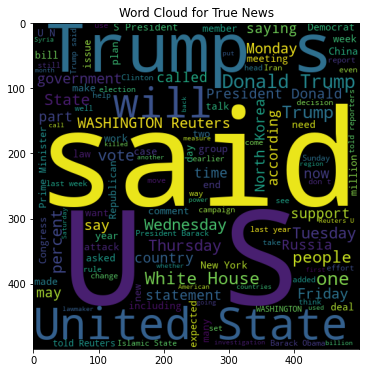

In [41]:
true_news_wc = wc.generate(df[df['label'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.title ("Word Cloud for True News")
plt.imshow(true_news_wc)
plt.show()

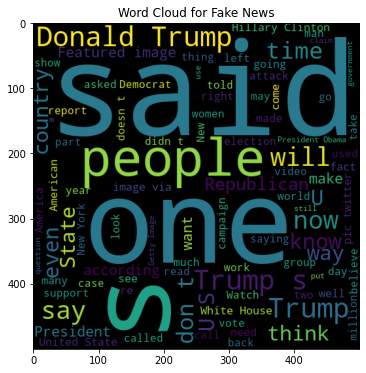

In [46]:
fake_news_wc = wc.generate(df[df['label'] == 1]['text'].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.title ("Word Cloud for Fake News")
plt.imshow(fake_news_wc)
plt.show()